# Εξαγωγή Δεδομένων DORIS από Αρχεία (DORIS) RINEX

Θα χρειστούμε τις παρακάτω βιβλιοθήκες:

In [21]:
# import dsoclasses
from dsoclasses.rinex.doris.rinex import DorisRinex
from dsoclasses.time.pyattotime import at2pt
# import modules for plotting ...
import matplotlib.pyplot as plt
import numpy as np

Το όνομα του αρχείου RINEX που θα χρησιμοποιήσουμε

In [22]:
drinex = "../data/s6arx24001.001"

Δημιουργούμε ένα αντικείμενο τύπου `DorisRinex`. Η αρχικοποίηση θα διαβάσει τις πληροφορίες του header.

In [23]:
rnx = DorisRinex(drinex)

Μπορούμε για παράδειγμα να δούμε όλους τους σταθμούς (beacons) για τους οποίους έχουμε παρατηρήσεις:

In [24]:
for beacon in rnx.beacons:
    print('Domes {:9s} Id {:4s} Name {:20s} Type {:1d} Num {:3s}'.format(
        beacon['domes'], beacon['id'], beacon['name'], beacon['type'], beacon['num']))

Domes 49804S004 Id COBB Name COLD BAY             Type 3 Num D01
Domes 40127S009 Id YEMB Name YELLOWKNIFE          Type 4 Num D02
Domes 43001S005 Id THUB Name THULE                Type 3 Num D03
Domes 40405S043 Id GONC Name GOLDSTONE            Type 4 Num D04
Domes 40451S178 Id GRFB Name GREENBELT            Type 3 Num D05
Domes 40503S006 Id SOFC Name SOCORRO              Type 3 Num D06
Domes 49914S003 Id MIAB Name MIAMI                Type 4 Num D07
Domes 41201S002 Id MNAC Name MANAGUA              Type 3 Num D08
Domes 42005S003 Id SCSC Name SANTA CRUZ           Type 4 Num D09
Domes 97205S001 Id LAOB Name LE LAMENTIN          Type 3 Num D10
Domes 97301S006 Id KRWB Name KOUROU               Type 4 Num D11
Domes 41508S005 Id SJVC Name SAN JUAN             Type 4 Num D12
Domes 41781S001 Id HROC Name HANGA ROA            Type 4 Num D13
Domes 41507S008 Id RISC Name RIO GRANDE           Type 3 Num D14
Domes 66018S002 Id BEMB Name BELGRANO             Type 3 Num D15
Domes 30604S003 Id TRJB N

Μπορούμε τώρα να προσπελάσουμε το αρχείο, ανά data block (ίδια εποχή, `for block in rnx`) και σταθμό (μέσα στο data block, `for beacon, data in block:`). Θα διαλέξουμε τον σταθμό στον Διόνυσο (βλ. παραπάνω) και θα δούμε τις καταγραφές της θερμοκρασίας. 

In [25]:
# DORIS beacon
diob = 'D31'

# θα αποθηκεύσουμε τα δεδομένα εδώ
t = []; T = [];

# για κάθε data block στον RINEX ...
for block in rnx:
    # για κάθε σταθμό στο data block ...
    for beacon, data in block:
        # η μεταβλητή beacon έχει την ονομασία του σταθμού (π.χ. 'D01') ενώ το data
        # τη λίστα των παρατηρήσεων, π.χ.
        # {'L1': {'value': -2446791.601, 'm1': None, 'm2': None}, 'L2': {'value': -3849973.536, 'm1': None, 'm2': None}, 'C1': ..., 'H': {'value': 70.005, 'm1': None, 'm2': 1}}
        if beacon == diob:
            # βρήκαμε τον Διόνυσο !
            # print("{:} {:.2f}".format(block.t().strftime("%y/%m/%d %H:%M:%S"), data['T']['value']))
            t.append(block.t())
            T.append(data['T']['value'])

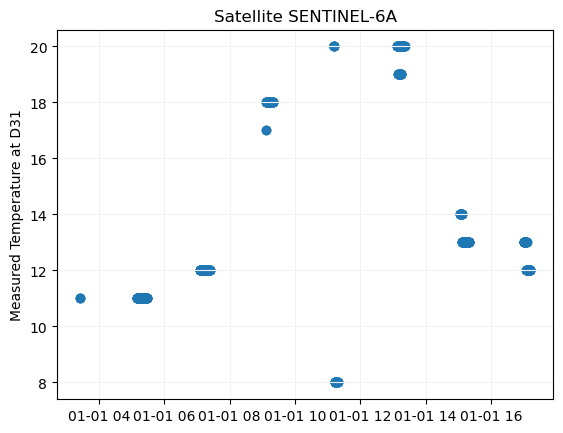

In [26]:
# create a scatterplot of extracted Temperature values w.r.t. time
plt.scatter([at2pt(ti) for ti in t], T, alpha=0.5)
plt.grid(color='0.95')
plt.ylabel("Measured Temperature at {:}".format(diob))
plt.title("Satellite {:}".format(rnx.sat_name))
plt.show()